# Compute relationship between size and syllable use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from aging.plotting import figure, legend, format_plots, COLORMAPS, PLOT_CONFIG, save_factory
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig2", tight_layout=False)

In [3]:
def zscore(ser: pd.Series):
    return (ser - ser.mean()) / ser.std()


def demean(ser: pd.Series):
    return ser - ser.mean()


def quantile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'q_{:0.02f}'.format(n)
    return percentile_

In [4]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet"
)
df = df[keep_syllables]

size_df = pd.read_parquet(
    '/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_mouse_area_df_v00.parquet'
)
age_cut = pd.cut(size_df.index.get_level_values('age'), 19)

size_df.loc[size_df['quant_0.5'] == 0, 'quant_0.5'] = np.nan
sizes_col = size_df['quant_0.5']
sizes_col = sizes_col.groupby('mouse').apply(lambda df: df.sort_index(level='age').interpolate()).droplevel(0)

# sizes_col = zscore(sizes_col.groupby(age_cut, observed=True).transform(demean))
sizes_col = sizes_col.groupby(age_cut, observed=True).transform(zscore)
sizes_col = sizes_col.fillna(0)
sizes_col = sizes_col.loc[df.index]

# make sure df matches sizes
df = df.loc[sizes_col.index]
age = df.index.get_level_values("age")

In [5]:
age_cut = pd.cut(df.index.get_level_values('age'), 19)

In [6]:
df['size'] = sizes_col

In [7]:
corrs = df.corr(method="spearman").loc["size"].iloc[:-1]

In [8]:
df.head()

syllables                                                                                               0  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   7f63f2a3-29b6-400d-bec1-33b9549004cb 2023-12-01 10:54:30  0.001755   
    4M_01_02 4M_01_02     otgy_4M_01   3ed61b86-0061-4d9e-9eea-61c8bdb497bc 2023-12-01 08:00:22  0.002983   
    4M_01_03 4M_01_03     otgy_4M_01   c7b0fe38-3cfb-43e3-9eb8-e3db19df6920 2023-12-01 11:04:03  0.004167   
    4M_01_04 4M_01_04     otgy_4M_01   65f7626b-ac07-4d1e-93b9-2b0320cb740b 2023-12-01 07:51:47  0.003090   
    4M_02_01 4M_02_01     otgy_4M_02   24951d9b-4156-470f-929a-c0daadfd768b 2023-12-01 12:53:09  0.001386   

syllables                                                                                               2  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   7f63f2a3-29b6-400d-bec1-33b9549004cb 2023-12-01 10:54:30  0.032475   
    4M_01_02 4M_01_02     otgy_4M_01   3ed61b86-0061-4d9e-9eea-61c8bdb497bc 2023-12-01 08:00:22  0.012232   
    4M_01_03 4M_01_03     otgy_4M_01   c7b0fe38-3cfb-43e3-9eb8-e3db19df6920 2023-12-01 11:04:03  0.013542   
    4M_01_04 4M_01_04     otgy_4M_01   65f7626b-ac07-4d1e-93b9-2b0320cb740b 2023-12-01 07:51:47  0.011974   
    4M_02_01 4M_02_01     otgy_4M_02   24951d9b-4156-470f-929a-c0daadfd768b 2023-12-01 12:53:09  0.021822   

syllables                                                                                               4  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   7f63f2a3-29b6-400d-bec1-33b9549004cb 2023-12-01 10:54:30  0.006144   
    4M_01_02 4M_01_02     otgy_4M_01   3ed61b86-0061-4d9e-9eea-61c8bdb497bc 2023-12-01 08:00:22  0.003878   
    4M_01_03 4M_01_03     otgy_4M_01   c7b0fe38-3cfb-43e3-9eb8-e3db19df6920 2023-12-01 11:04:03  0.001389   
    4M_01_04 4M_01_04     otgy_4M_01   65f7626b-ac07-4d1e-93b9-2b0320cb740b 2023-12-01 07:51:47  0.011587   
    4M_02_01 4M_02_01     otgy_4M_02   24951d9b-4156-470f-929a-c0daadfd768b 2023-12-01 12:53:09  0.004849   

syllables                                                                                               5  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   7f63f2a3-29b6-400d-bec1-33b9549004cb 2023-12-01 10:54:30  0.031890   
    4M_01_02 4M_01_02     otgy_4M_01   3ed61b86-0061-4d9e-9eea-61c8bdb497bc 2023-12-01 08:00:22  0.034606   
    4M_01_03 4M_01_03     otgy_4M_01   c7b0fe38-3cfb-43e3-9eb8-e3db19df6920 2023-12-01 11:04:03  0.039236   
    4M_01_04 4M_01_04     otgy_4M_01   65f7626b-ac07-4d1e-93b9-2b0320cb740b 2023-12-01 07:51:47  0.041329   
    4M_02_01 4M_02_01     otgy_4M_02   24951d9b-4156-470f-929a-c0daadfd768b 2023-12-01 12:53:09  0.028403   

syllables                                                                                               6  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   7f63f2a3-29b6-400d-bec1-33b9549004cb 2023-12-01 10:54:30  0.004974   
    4M_01_02 4M_01_02     otgy_4M_01   3ed61b86-0061-4d9e-9eea-61c8bdb497bc 2023-12-01 08:00:22  0.002088   
    4M_01_03 4M_01_03     otgy_4M_01   c7b0fe38-3cfb-43e3-9eb8-e3db19df6920 2023-12-01 11:04:03  0.001736   
    4M_01_04 4M_01_04     otgy_4M_01   65f7626b-ac07-4d1e-93b9-2b0320cb740b 2023-12-01 07:51:47  0.000000   
    4M_02_01 4M_02_01     otgy_4M_02   24951d9b-4156-470f-929a-c0daadfd768b 2023-12-01 12:53:09  0.002078   

syllables                                                                                               7  \
age mouse    subject_name session_name uuid                            

In [9]:
corr_sig_df = []
for syll in df.columns[:-1]:
    c = spearmanr(df[syll], df['size'])
    corr_sig_df.append(dict(syllable=syll, rho=c.statistic, p=c.pvalue))
corr_sig_df = pd.DataFrame(corr_sig_df)
corr_sig_df['adj_p'] = multipletests(corr_sig_df['p'], method='bonferroni')[1]

In [10]:
corr_sig_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/male_size_correlations.csv')

In [8]:
# shuffle size, compute correlations
shuff_df = df.copy()
sc = []
for i in range(500):
    shuff_df['size'] = df['size'].sample(frac=1, replace=False, random_state=i).to_numpy()
    shuff_corrs = shuff_df.corr(method="spearman").loc["size"].iloc[:-1]
    sc.append(shuff_corrs.rename(i))

webf NOT subset; don't know how to subset; dropped


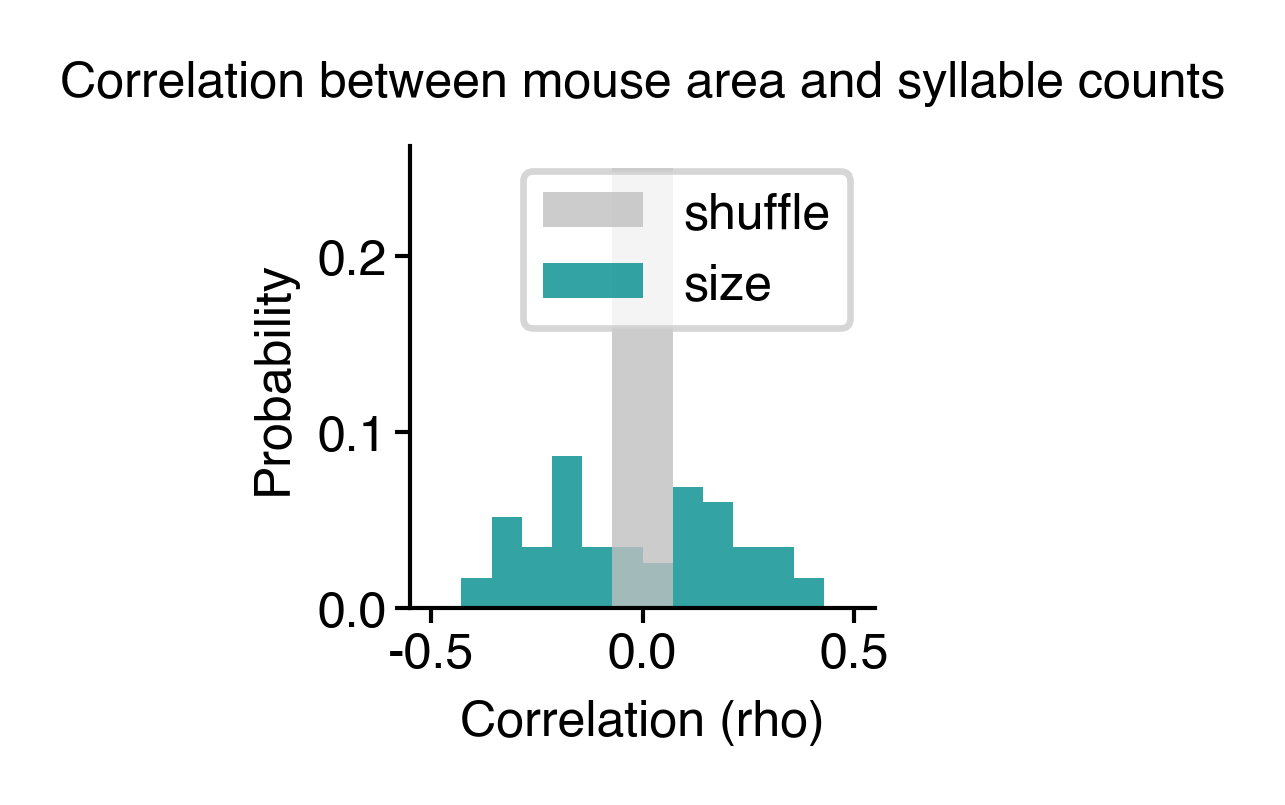

In [9]:
fig = figure(1, 1)
ax = sns.histplot(
    [pd.DataFrame(sc).mean().rename("shuffle"), corrs],
    palette=["silver", COLORMAPS.ont_male(255)],
    bins=np.linspace(-0.5, 0.5, 15),
    stat="probability",
    alpha=0.8,
    element='step',
    linewidth=0,
)
ax.set(
    xlabel="Correlation (rho)",
    title="Correlation between mouse area and syllable counts",
)
sns.despine()
saver(fig, "male-syllable-count-vs-size-correlation-hist");

In [12]:
# shuffle size within age cut, compute correlations
shuff_df = df.copy()
sc = []
for i in tqdm(range(500)):
    sample = df.groupby('age')['size'].transform(lambda x: x.sample(frac=1, replace=False, random_state=i).to_numpy())
    # sample = df.groupby(age_cut, observed=True)['size'].transform(lambda x: x.sample(frac=1, replace=False, random_state=i).to_numpy())
    shuff_df['size'] = sample
    shuff_corrs = shuff_df.corr(method="spearman").loc["size"].iloc[:-1]
    sc.append(shuff_corrs.rename(i))
sc = pd.DataFrame(sc)

  0%|          | 0/500 [00:00<?, ?it/s]

webf NOT subset; don't know how to subset; dropped


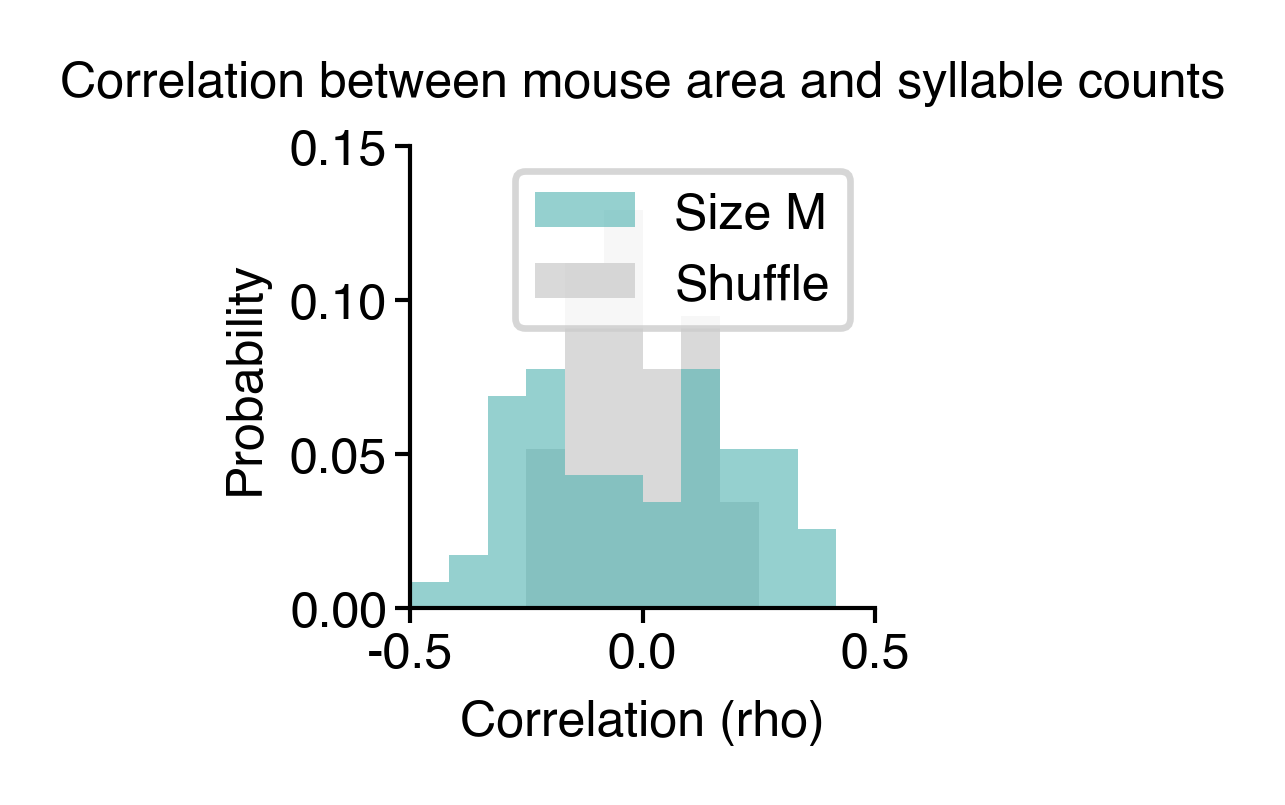

In [13]:
fig = figure(1, 1)
ax = sns.histplot(
    [corrs.rename("Size M"), sc.mean().rename("Shuffle")],
    palette=[COLORMAPS.ont_male(155), "silver"],
    bins=np.linspace(-0.5, 0.5, 13),
    stat="probability",
    alpha=0.6,
    element='step',
    linewidth=0,
)
ax.set(
    xlabel="Correlation (rho)",
    title="Correlation between mouse area and syllable counts",
    xlim=(-0.5, 0.5),
    ylim=(0, 0.15),
)
sns.despine()
saver(fig, "male-syllable-count-vs-size-correlation-hist-within-age-shuff");

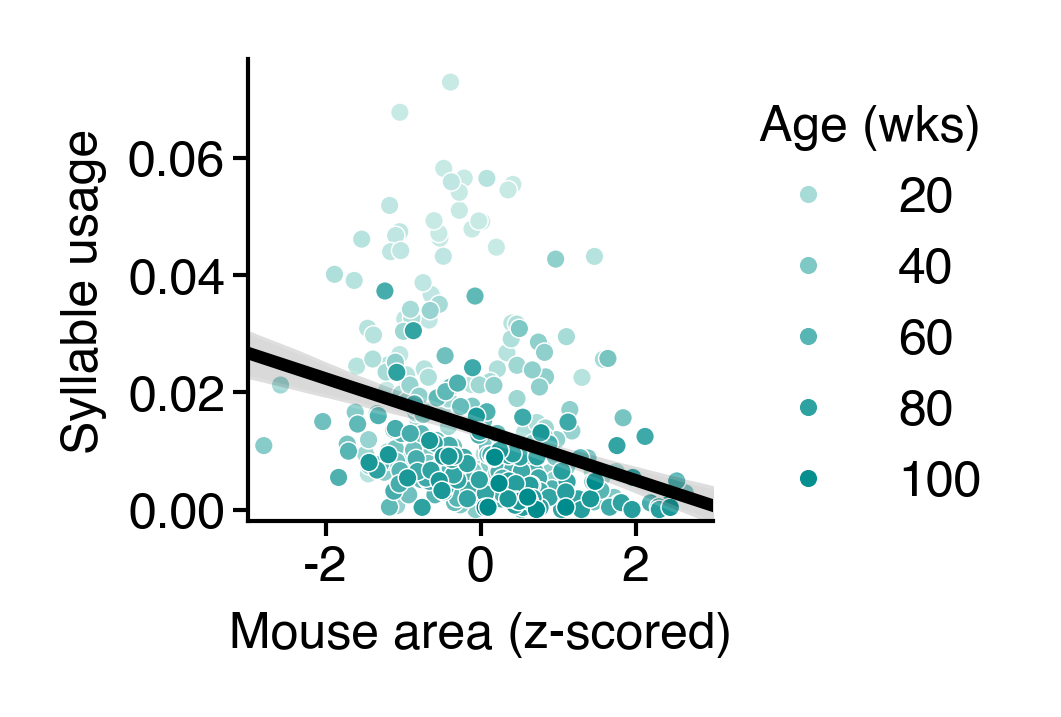

In [12]:
syllable = 42
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

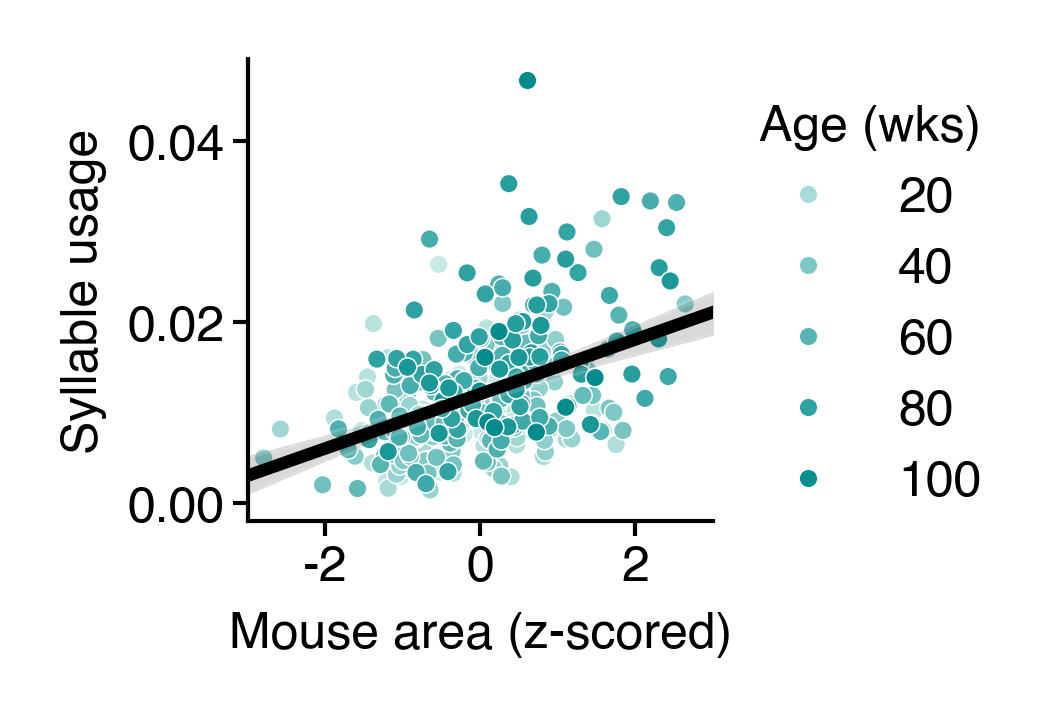

In [13]:
syllable = 18
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

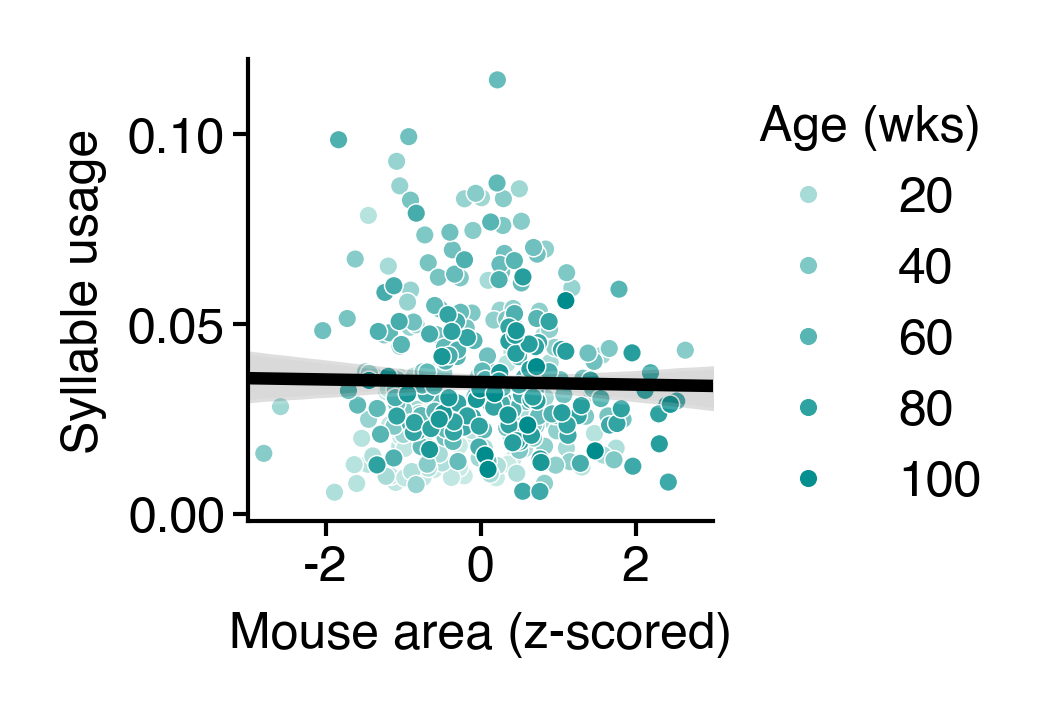

In [14]:
syllable = 16
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

In [15]:
corrs.sort_values()

syllables
42   -0.384532
11   -0.347603
13   -0.316957
69   -0.310423
27   -0.301987
32   -0.294906
76   -0.290670
73   -0.284709
62   -0.275331
6    -0.272885
9    -0.258965
64   -0.184480
70   -0.181080
23   -0.178420
24   -0.176690
53   -0.160284
67   -0.139398
52   -0.136029
84   -0.134168
2    -0.126059
12   -0.117965
36   -0.100239
71   -0.084498
49   -0.082581
41   -0.061788
44   -0.038049
97   -0.027695
85   -0.019652
98   -0.007187
16    0.008477
59    0.015027
10    0.026101
33    0.038244
39    0.053487
68    0.085340
93    0.112755
95    0.133699
4     0.135786
14    0.144789
30    0.145253
79    0.149735
63    0.165095
60    0.165454
17    0.171713
54    0.202394
90    0.206118
74    0.209595
66    0.240568
83    0.242568
77    0.251061
7     0.263188
55    0.275610
5     0.297792
0     0.306455
61    0.335438
50    0.360393
25    0.381517
18    0.443665
Name: size, dtype: float64

## Females

In [14]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet"
)
df = df[keep_syllables]

size_df = pd.read_parquet(
    '/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_mouse_area_df_v00.parquet'
)
age_cut = pd.cut(size_df.index.get_level_values('age'), 19)

size_df.loc[size_df['quant_0.5'] == 0, 'quant_0.5'] = np.nan
sizes_col = size_df['quant_0.5']
sizes_col = sizes_col.groupby('mouse').apply(lambda df: df.sort_index(level='age').interpolate()).droplevel(0)

# sizes_col = zscore(sizes_col.groupby(age_cut, observed=True).transform(demean))
sizes_col = sizes_col.groupby(age_cut, observed=True).transform(zscore)
sizes_col = sizes_col.fillna(0)
sizes_col = sizes_col.loc[df.index]

# make sure df matches sizes
df = df.loc[sizes_col.index]
age = df.index.get_level_values("age")

In [15]:
df = df[age < 120]

In [16]:
age_cut = pd.cut(df.index.get_level_values('age'), 25)

In [17]:
df['size'] = sizes_col

In [18]:
corrs = df.corr(method="spearman").loc["size"].iloc[:-1]

In [19]:
corr_sig_df = []
for syll in df.columns[:-1]:
    c = spearmanr(df[syll], df['size'])
    corr_sig_df.append(dict(syllable=syll, rho=c.statistic, p=c.pvalue))
corr_sig_df = pd.DataFrame(corr_sig_df)
corr_sig_df['adj_p'] = multipletests(corr_sig_df['p'], method='bonferroni')[1]

In [20]:
corr_sig_df.to_csv('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/stats/female_size_correlations.csv')

In [21]:
# shuffle size within age cut, compute correlations
shuff_df = df.copy()
sc = []
for i in tqdm(range(500)):
    sample = df.groupby('age')['size'].transform(lambda x: x.sample(frac=1, replace=False, random_state=i).to_numpy())
    # sample = df.groupby(age_cut, observed=True)['size'].transform(lambda x: x.sample(frac=1, replace=False, random_state=i).to_numpy())
    shuff_df['size'] = sample
    shuff_corrs = shuff_df.corr(method="spearman").loc["size"].iloc[:-1]
    sc.append(shuff_corrs.rename(i))
sc = pd.DataFrame(sc)

  0%|          | 0/500 [00:00<?, ?it/s]

webf NOT subset; don't know how to subset; dropped


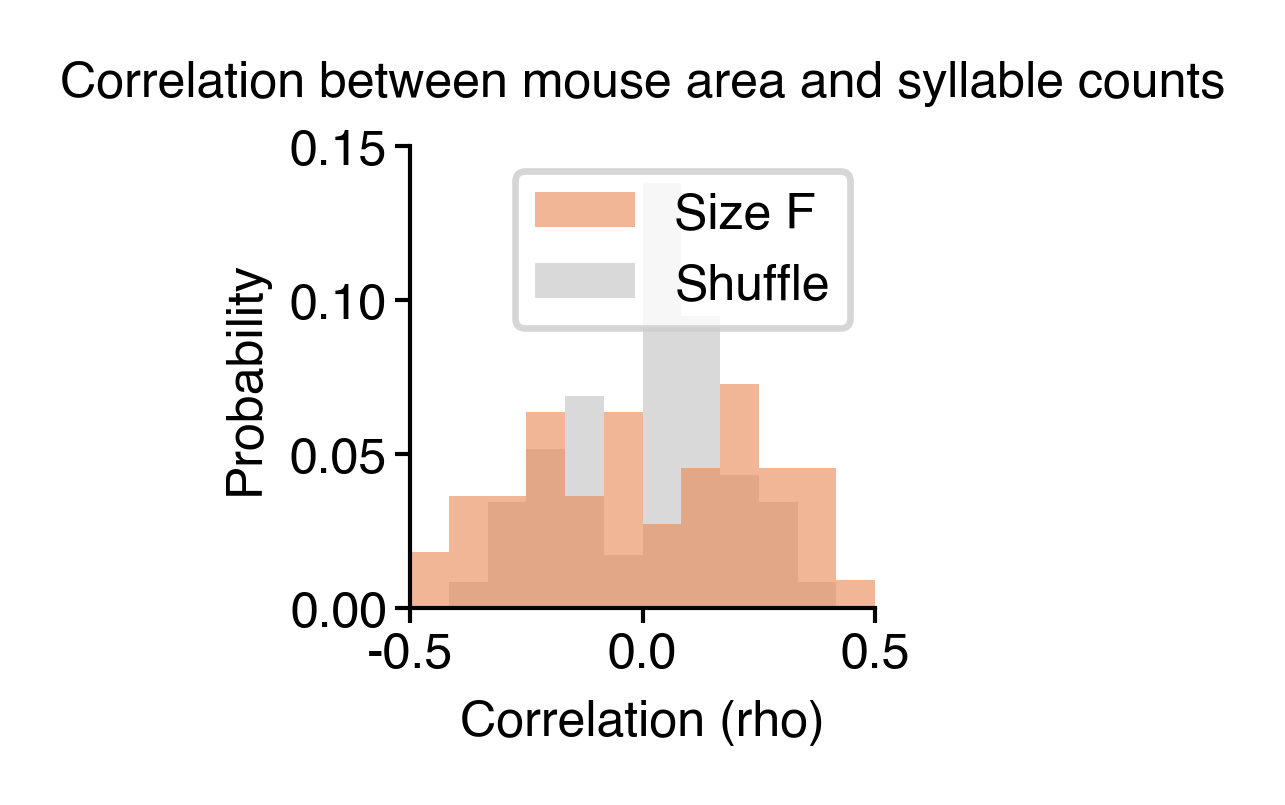

In [22]:
fig = figure(1, 1)
ax = sns.histplot(
    [corrs.rename("Size F"), sc.mean().rename("Shuffle")],
    palette=[COLORMAPS.ont_female(155), "silver"],
    bins=np.linspace(-0.5, 0.5, 13),
    stat="probability",
    alpha=0.6,
    element='step',
    linewidth=0,
)
ax.set(
    xlabel="Correlation (rho)",
    title="Correlation between mouse area and syllable counts",
    xlim=(-0.5, 0.5),
    ylim=(0, 0.15),
)
sns.despine()
saver(fig, "female-syllable-count-vs-size-correlation-hist-within-age-shuff");

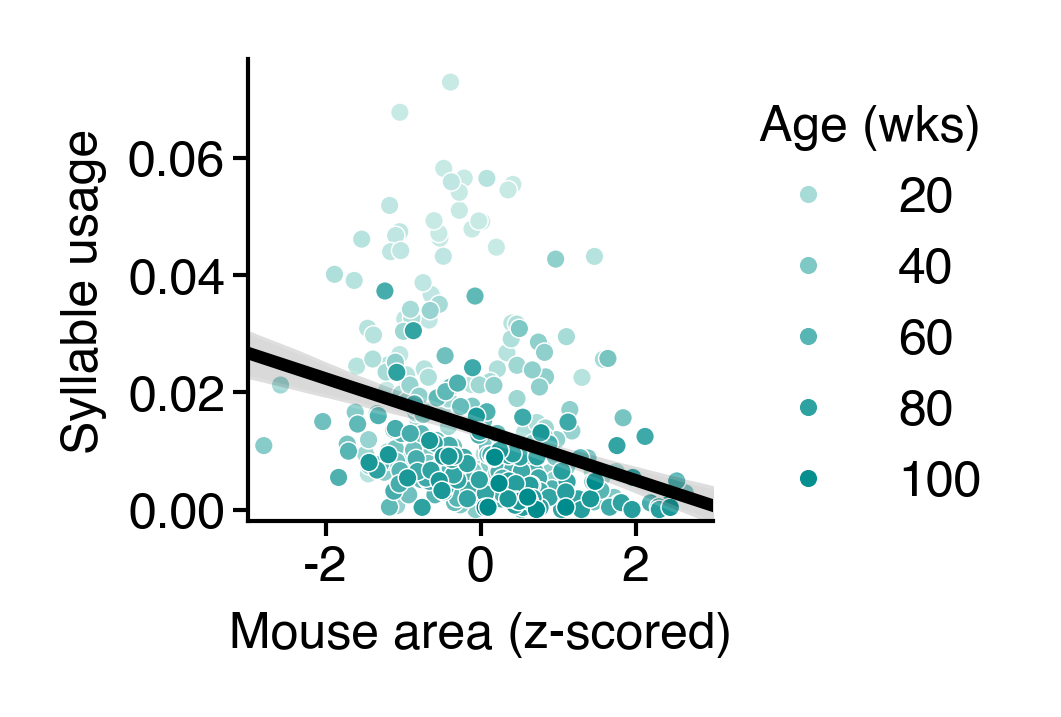

In [12]:
syllable = 42
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

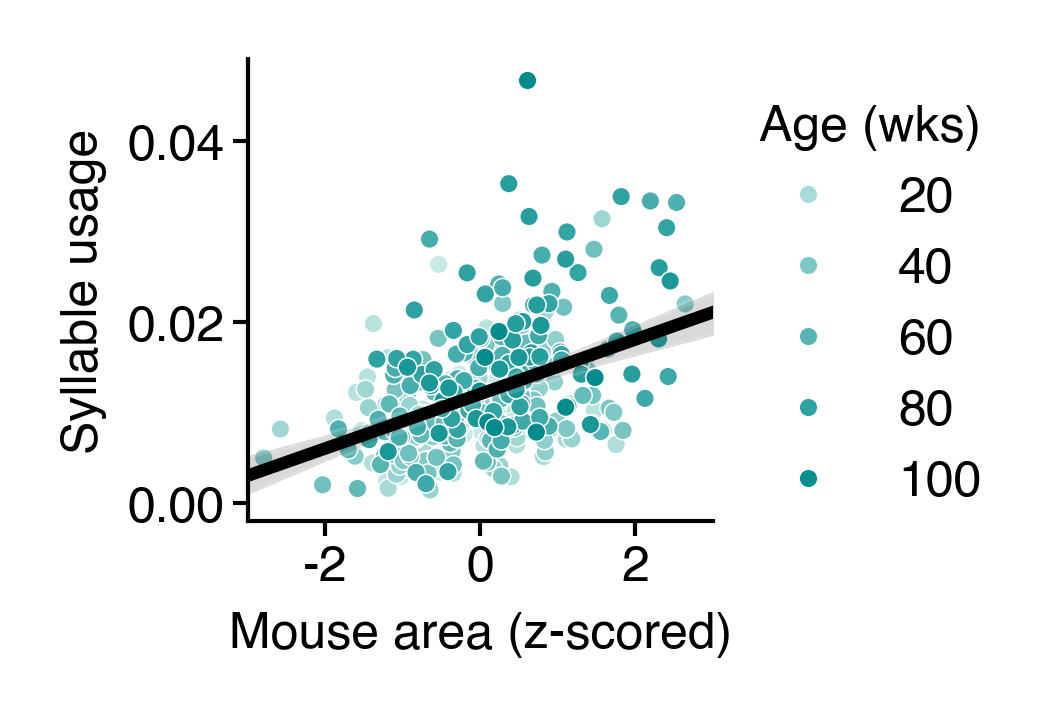

In [13]:
syllable = 18
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

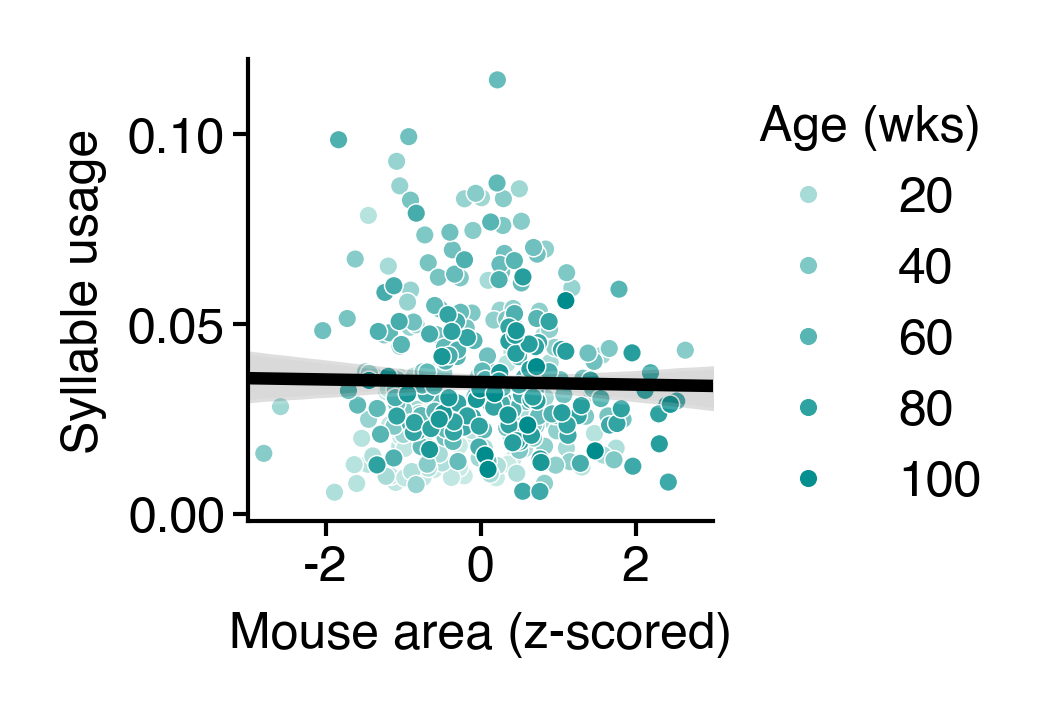

In [14]:
syllable = 16
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_male, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

In [15]:
corrs.sort_values()

syllables
42   -0.384532
11   -0.347603
13   -0.316957
69   -0.310423
27   -0.301987
32   -0.294906
76   -0.290670
73   -0.284709
62   -0.275331
6    -0.272885
9    -0.258965
64   -0.184480
70   -0.181080
23   -0.178420
24   -0.176690
53   -0.160284
67   -0.139398
52   -0.136029
84   -0.134168
2    -0.126059
12   -0.117965
36   -0.100239
71   -0.084498
49   -0.082581
41   -0.061788
44   -0.038049
97   -0.027695
85   -0.019652
98   -0.007187
16    0.008477
59    0.015027
10    0.026101
33    0.038244
39    0.053487
68    0.085340
93    0.112755
95    0.133699
4     0.135786
14    0.144789
30    0.145253
79    0.149735
63    0.165095
60    0.165454
17    0.171713
54    0.202394
90    0.206118
74    0.209595
66    0.240568
83    0.242568
77    0.251061
7     0.263188
55    0.275610
5     0.297792
0     0.306455
61    0.335438
50    0.360393
25    0.381517
18    0.443665
Name: size, dtype: float64